## Ensemble methods: Voting


Hi! Here we are going to explore how the voting classifier works, and compare them to the base classifiers we chose below. Voting classifiers work by aggregating the predictions of each classifier, and then predicting the class that gets the most votes. This method is called hard voting, but this classifier will be using soft voting instead. This will make it so that it will predict the class with the highest probabilty, which till give more weight to highly confident votes, rather than just majority vote.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import sys

The data that we wil be using is from Scikit-Learn's dataset library called digits. The dataset is made up of 1797 8x8 images. Each image represents a hand-written digit that range from 0 - 9.

In [ ]:
mnist = datasets.load_digits()
X, y = mnist.data, mnist.target

Lets take a look at one of these images at a random index of the data. We would first have to transform it into an 8x8 feature vector. Each feature represents one pixel's intensity, ranging from 0 - 255 (white to black).

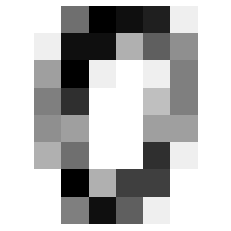

In [ ]:
index = np.random.randint(len(X))
some_digit = X[index]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

Let's see the result of this image.

In [ ]:
y[index]

0

In order to build our base models, let's first split the data into train and test sets, and then scale it.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here we have 3 base classifiers, Logisitic Regression, Random Forest, and Support Vector Machine. Lets compare the accuracy between our base classifier and then see our voting classifier's accuracy. As we can see, our base classifier's accuracy is pretty high, and our voting classifier is slighty better than the SVM classifier.

In [ ]:
log_classifier = LogisticRegression()
random_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)

voting_classifier = VotingClassifier(
    estimators=[('lr', log_classifier), ('rf', random_classifier), ('svc', svm_classifier)],
    voting='soft')

for clf in (log_classifier, random_classifier, svm_classifier, voting_classifier):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, ':{:.4f}'.format(accuracy_score(y_test, y_pred)))

LogisticRegression :0.9593
RandomForestClassifier :0.9759
SVC :0.9852
VotingClassifier :0.9852


Since our base classifier's were diverse, ensemble methods work best when predictors are independent from one another. Our base algorithms are different, they will make different kinds of errors, which would increase our the ensemble method's accuracy.